# Capstone Project: MRI Hippocampus Segmentation using ADNI dataset

## Data Loading and Visualization

### Downloading Data

In [ ]:
import gdown 
gdown.download('https://drive.google.com/uc?id=1ydyO_QbsU_B4b52EknfjHtJM7sM8v2pV', 'ADNI_Original.zip', quiet=False)
gdown.download('https://drive.google.com/uc?id=1BfhG-p8ZFxgMe1BFMrRJwvy6MWEjSWEI', 'ADNI_Labels.zip', quiet=False)


Access denied with the following error:



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1ydyO_QbsU_B4b52EknfjHtJM7sM8v2pV 

Downloading...
From: https://drive.google.com/uc?id=1BfhG-p8ZFxgMe1BFMrRJwvy6MWEjSWEI
To: /content/ADNI_Labels.zip
100%|██████████| 562k/562k [00:00<00:00, 36.9MB/s]


'ADNI_Labels.zip'

In [ ]:
!unzip "ADNI_Labels.zip" -d "ADNI_Labels" &> /dev/null
!unzip "ADNI_Original.zip" -d "ADNI_Original" &> /dev/null

### Visualizing single data

In [ ]:
# Imports
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
# from skimage import io
import os

In [ ]:
# Load single MRI and Masks
# first_mri = io.imread("/content/ADNI_Original/100/ADNI_002_S_0295_13722.nii.gz", plugin="simpleitk")
# first_lbl_l = io.imread("/content/ADNI_Labels/Labels_100_NIFTI/ADNI_002_S_0295_13722_L.nii", plugin="simpleitk")
# first_lbl_r = io.imread("/content/ADNI_Labels/Labels_100_NIFTI/ADNI_002_S_0295_13722_R.nii", plugin="simpleitk")

In [ ]:
# Load single MRI and Masks
first_mri =  np.array(nib.load("/content/ADNI_Original/100/ADNI_002_S_0295.nii.gz").dataobj).T
first_lbl_l = np.array(nib.load("/content/ADNI_Labels/Labels_100/ADNI_002_S_0295_L.nii.gz").dataobj).T
first_lbl_r = np.array(nib.load("/content/ADNI_Labels/Labels_100/ADNI_002_S_0295_R.nii.gz").dataobj).T

In [ ]:
first_mri.shape

(189, 233, 197)

In [ ]:
first_mri.max()

17004

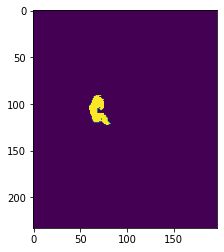

In [ ]:
plt.imshow(first_lbl_l[74])

In [ ]:
first_mri/first_mri.max()

array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.01676076, 0.01905434, 0.01676076, ..., 0.01487885,
         0.01634909, 0.01652552],
        [0.02017172, 0.0151729 , 0.01570219, ..., 0.01364385,
         0.01340861, 0.01399671],
        [0.0242884 , 0.01746648, 0.01870148, ..., 0.01570219,
         0.01387909, 0.01493766]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.01693719, 0.01323218, 0.01440837, ..., 0.01493766,
         0.01552576, 0.01417314],
        [0.0

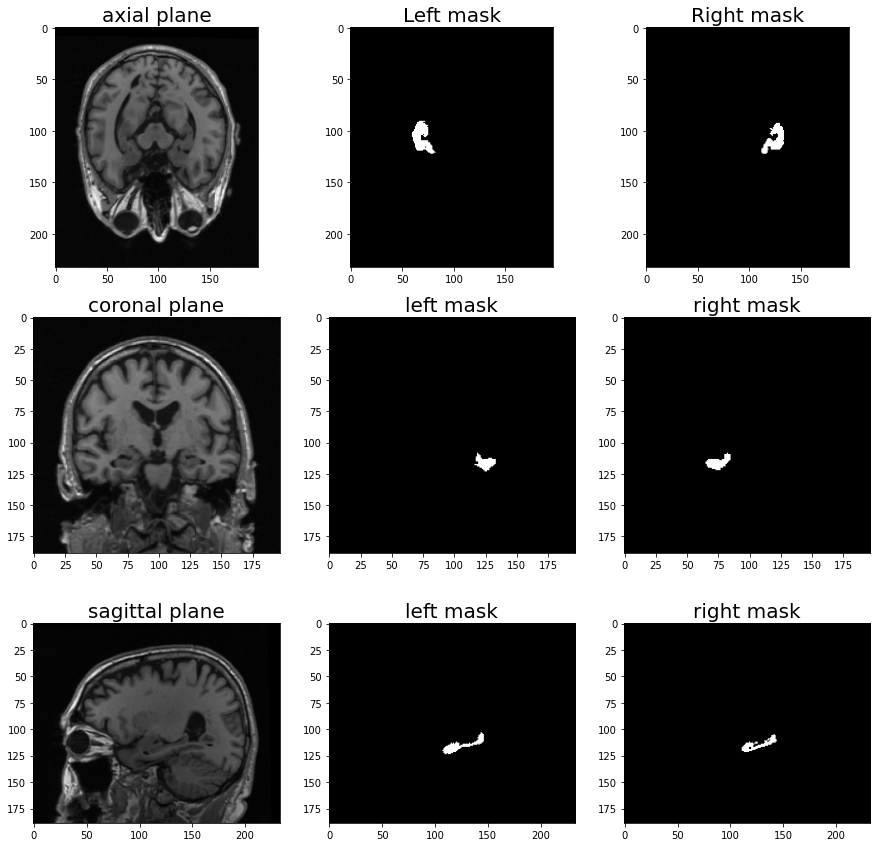

In [ ]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(3,3,1)
ax1.imshow(first_mri[74,:,:], cmap='gray')
plt.title("axial plane", fontsize=20)

ax1 = fig.add_subplot(3,3,2)
ax1.imshow(first_lbl_l[74,:,:], cmap='gray')
plt.title("Left mask", fontsize=20)

ax1 = fig.add_subplot(3,3,3)
ax1.imshow(first_lbl_r[74,:,:], cmap='gray')
plt.title("Right mask", fontsize=20)

ax2 = fig.add_subplot(3,3,4)
ax2.imshow(np.flip(first_mri[:,118,:]), cmap='gray')
plt.title("coronal plane", fontsize=20)

ax2 = fig.add_subplot(3,3,5)
ax2.imshow(np.flip(first_lbl_l[:,118,:]), cmap='gray')
plt.title("left mask", fontsize=20)

ax2 = fig.add_subplot(3,3,6)
ax2.imshow(np.flip(first_lbl_r[:,118,:]), cmap='gray')
plt.title("right mask", fontsize=20)

ax3 = fig.add_subplot(3,3,7)
ax3.imshow(np.flip(first_mri[:,:,72]), cmap='gray')
plt.title("sagittal plane", fontsize=20);

ax3 = fig.add_subplot(3,3,8)
ax3.imshow(np.flip(first_lbl_l[:,:,72]), cmap='gray')
plt.title("left mask", fontsize=20);

ax3 = fig.add_subplot(3,3,9)
ax3.imshow(np.flip(first_lbl_r[:,:,125]), cmap='gray')
plt.title("right mask", fontsize=20);
plt.show()

In [ ]:
first_lbl_l[74].shape

(233, 197)

In [ ]:
mask_lr = np.concatenate((first_lbl_l[74,:,0:100], first_lbl_r[74,:,100:197]), 1)

In [ ]:
mask_lr = np.flip(first_lbl_l[:,:,72])+np.flip(first_lbl_r[:,:,72])

In [ ]:
mask_lr.shape

(189, 233)

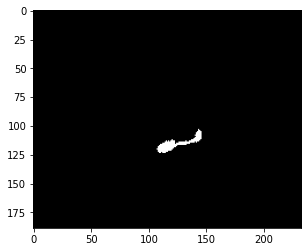

In [ ]:
plt.imshow(mask_lr, cmap='gray')

In [ ]:
img_and_mask = (np.flip(first_mri[:,:,72])/first_mri.max() + mask_lr*0.5)

In [ ]:
img_and_mask.max()

0.8195718654434251

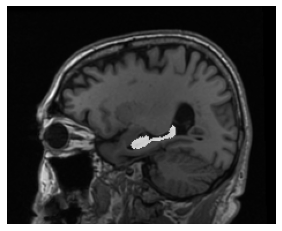

In [ ]:
plt.axis('off')
plt.imshow(img_and_mask, cmap='gray')

### Data Exploration 
 * MRI Shape
 * MRI Size taken in memory
 * MRI min and max mavlues

In [ ]:
print(first_mri.shape)
print(first_lbl_l.shape)
print(first_lbl_r.shape)

(189, 233, 197)
(189, 233, 197)
(189, 233, 197)


In [ ]:
print(first_mri.max())
print(first_lbl_l.max())
print(first_lbl_r.max())

17004
1
1


In [ ]:
print(first_mri.min())
print(first_lbl_l.min())
print(first_lbl_r.min())

0
0
0


In [ ]:
print(type(first_mri[0][0][0]))
print(type(first_lbl_l[0][0][0]))
print(type(first_lbl_r[0][0][0]))


<class 'numpy.int16'>
<class 'numpy.uint8'>
<class 'numpy.uint8'>


In [ ]:
print(first_mri.nbytes, first_mri.nbytes/(1024*1024))
print(first_lbl_l.nbytes,first_lbl_l.nbytes/(1024*1024) )
print(first_lbl_r.nbytes,first_lbl_l.nbytes/(1024*1024) )


17350578 16.54680061340332
8675289 8.27340030670166
8675289 8.27340030670166


Checking min and max value of each data individually

In [ ]:
# MRI_PATH = '/content/ADNI_Original'
# LABELS_PATH = '/content/ADNI_Labels'

# filelist_100 = os.listdir(MRI_PATH+"/100") # List the folders
# filelist_100 = sorted(filelist_100)

# for i in range(len(filelist_100)):
#     mri = io.imread(MRI_PATH+"/100/"+filelist_100[i], plugin="simpleitk")
#     print(filelist_100[i], mri.min(), mri.max())
# for i in range(len(filelist_100)):
#     mri = io.imread(LABELS_PATH+"/Labels_100_NIFTI/"+filelist_100[i][:-7]+"_L.nii", plugin="simpleitk")
#     print(filelist_100[i]+"_Mask_L", mri.min(), mri.max())
# for i in range(len(filelist_100)):
#     mri = io.imread(LABELS_PATH+"/Labels_100_NIFTI/"+filelist_100[i][:-7]+"_R.nii", plugin="simpleitk")
#     print(filelist_100[i]+"_Mask_R", mri.min(), mri.max())

ADNI_002_S_0295_13722.nii.gz 0.0 0.9882352941176471
ADNI_002_S_0413_14437.nii.gz 0.0 1.0
ADNI_002_S_0559_147119.nii.gz 0.0 1.0
ADNI_002_S_0729_153075.nii.gz 0.0 0.9843137254901959
ADNI_002_S_0782_20519.nii.gz 0.0 1.0
ADNI_002_S_0816_49010.nii.gz 0.0 1.0
ADNI_002_S_0938_25952.nii.gz 0.0 0.996078431372549
ADNI_002_S_0954_108600.nii.gz 0.0 1.0
ADNI_002_S_4225_257270.nii.gz 0.0 1.0
ADNI_003_S_0907_25737.nii.gz 0.0 0.996078431372549
ADNI_003_S_0908_54988.nii.gz 0.0 0.9882352941176471
ADNI_003_S_0931_26236.nii.gz 0.0 0.996078431372549
ADNI_003_S_1057_31613.nii.gz 0.0 1.0
ADNI_003_S_1059_29252.nii.gz 0.0 1.0
ADNI_003_S_1122_32044.nii.gz 0.0 1.0
ADNI_003_S_1257_42137.nii.gz 0.0 1.0
ADNI_003_S_4136_250173.nii.gz 0.0 1.0
ADNI_003_S_4142_254893.nii.gz 0.0 0.9607843137254903
ADNI_005_S_0222_11299.nii.gz 0.0 0.9647058823529412
ADNI_005_S_0448_33221.nii.gz 0.0 1.0
ADNI_005_S_0602_66117.nii.gz 0.0 1.0
ADNI_005_S_1341_43188.nii.gz 0.0 0.996078431372549
ADNI_006_S_0322_17197.nii.gz 0.0 0.98431372549019

In [ ]:
MRI_PATH = '/content/ADNI_Original'
LABELS_PATH = '/content/ADNI_Labels'

filelist_100 = os.listdir(MRI_PATH+"/100") # List the folders
filelist_100 = sorted(filelist_100)

for i in range(len(filelist_100)):
    mri = np.array(nib.load(MRI_PATH+"/100/"+filelist_100[i]).dataobj).T
    print(filelist_100[i], type(mri[0][0][0]), mri.min(), mri.max(), mri.nbytes/(1024*1024))
for i in range(len(filelist_100)):
    mri = np.array(nib.load(LABELS_PATH+"/Labels_100/"+filelist_100[i][:-7]+"_L.nii.gz").dataobj).T
    print(filelist_100[i]+"_Mask_L", type(mri[0][0][0]), mri.min(), mri.max(), mri.nbytes/(1024*1024))
for i in range(len(filelist_100)):
    mri = np.array(nib.load(LABELS_PATH+"/Labels_100/"+filelist_100[i][:-7]+"_R.nii.gz").dataobj).T
    print(filelist_100[i]+"_Mask_R", type(mri[0][0][0]), mri.min(), mri.max(), mri.nbytes/(1024*1024))

ADNI_002_S_0295.nii.gz <class 'numpy.int16'> 0 17004 16.54680061340332
ADNI_002_S_0413.nii.gz <class 'numpy.int16'> 0 15793 16.54680061340332
ADNI_002_S_0559.nii.gz <class 'numpy.int16'> 0 896 16.54680061340332
ADNI_002_S_0729.nii.gz <class 'numpy.int16'> 0 1063 16.54680061340332
ADNI_002_S_0782.nii.gz <class 'numpy.int16'> 0 32767 16.54680061340332
ADNI_002_S_0816.nii.gz <class 'numpy.int16'> 0 26142 16.54680061340332
ADNI_002_S_0938.nii.gz <class 'numpy.int16'> 0 13590 16.54680061340332
ADNI_002_S_0954.nii.gz <class 'numpy.int16'> 0 23758 16.54680061340332
ADNI_002_S_4225.nii.gz <class 'numpy.int16'> 0 1169 16.54680061340332
ADNI_003_S_0907.nii.gz <class 'numpy.int16'> 0 1079 16.54680061340332
ADNI_003_S_0908.nii.gz <class 'numpy.int16'> 0 1093 16.54680061340332
ADNI_003_S_0931.nii.gz <class 'numpy.int16'> 0 952 16.54680061340332
ADNI_003_S_1057.nii.gz <class 'numpy.int16'> 0 975 16.54680061340332
ADNI_003_S_1059.nii.gz <class 'numpy.int16'> 0 934 16.54680061340332
ADNI_003_S_1122.ni

In [ ]:
# Test both nibabel and skimage

import nibabel as nib
img_nib = np.array(nib.load('/content/ADNI_Labels/Labels_100/ADNI_002_S_4225_R.nii.gz').dataobj).T
img_io = io.imread("/content/ADNI_Labels/Labels_100/ADNI_002_S_4225_R.nii.gz", plugin="simpleitk")


In [ ]:
print(img_nib.min())
print(img_io.min())


0
26309.97


### Load entire dataset

In [ ]:
MRI_PATH = '/content/ADNI_Original'
LABELS_PATH = '/content/ADNI_Labels'

filelist_100 = os.listdir(MRI_PATH+"/100") # List the folders
filelist_100 = sorted(filelist_100)

# mri = [np.array(nib.load(MRI_PATH+"/100/"+f).dataobj).T for f in filelist_100[0:10]]
# mri_array = np.array(mri)

mri = [np.array(nib.load(LABELS_PATH+"/Labels_100/"+f[:-7]+"_L.nii.gz").dataobj).T for f in filelist_100]
labels_l_array = np.array(mri)

mri = [np.array(nib.load(LABELS_PATH+"/Labels_100/"+f[:-7]+"_R.nii.gz").dataobj).T for f in filelist_100]
labels_r_array = np.array(mri)

# del(mri)

In [ ]:
print(mri_array.max())
print(labels_l_array.max())
print(labels_r_array.max())

32767
1
1


In [ ]:
# for i in range(len(labels_l_array)):
#     labels_l_array[i] = labels_l_array[i] - labels_l_array[i].min()
#     labels_r_array[i] = labels_r_array[i] - labels_r_array[i].min()

In [ ]:
print(type(mri_array[0][0][0][0]))
print(type(labels_l_array[0][0][0][0]))
print(type(labels_r_array[0][0][0][0]))


<class 'numpy.int16'>
<class 'numpy.uint8'>
<class 'numpy.uint8'>


### Visualize histogram of masks for slicing

In [ ]:
mask_combined = np.zeros((189, 233, 197))

In [ ]:
LABELS_PATH = '/content/ADNI_Labels'

filelist_100 = os.listdir(LABELS_PATH+"/Labels_100") # List the folders
filelist_100 = sorted(filelist_100)


filelist_35 = os.listdir(LABELS_PATH+"/Labels_35") # List the folders
filelist_35 = sorted(filelist_35)

for i in range(len(filelist_100)):
    mask = np.array(nib.load(LABELS_PATH+"/Labels_100/"+filelist_100[i]).dataobj).T
    mask_combined = mask_combined + mask

for i in range(len(filelist_35)):
    mask = np.array(nib.load(LABELS_PATH+"/Labels_35/"+filelist_35[i]).dataobj).T
    mask_combined = mask_combined + mask

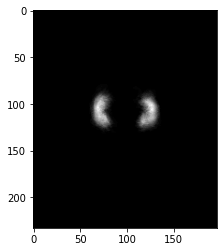

In [ ]:
plt.imshow(mask_combined[75], cmap='gray')

In [ ]:
mask_combined.max()

68.0

In [ ]:
labels_l_array.nbytes/(1024*1024)

827.340030670166

In [ ]:
mask_combined.shape

(189, 233, 197)

In [ ]:
mask_x = np.zeros((197))
mask_y = np.zeros((233))

for i in range(189):
    mask_x = mask_x + mask_combined[i].sum(0)
    mask_y = mask_y + mask_combined[i].sum(1)

In [ ]:
mask_x.shape

(197,)

<BarContainer object of 197 artists>

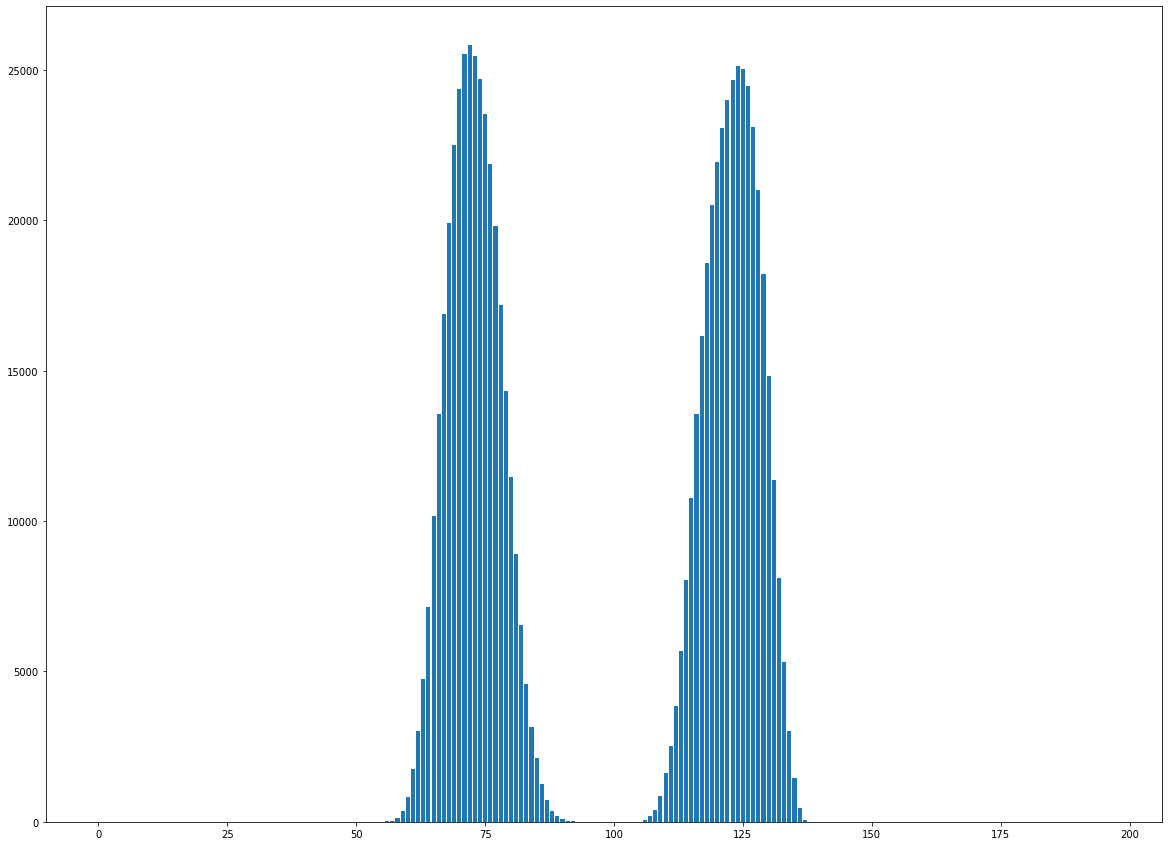

In [ ]:
plt.figure(figsize=(20,15))
plt.bar(np.arange(0,197), mask_x)


<BarContainer object of 233 artists>

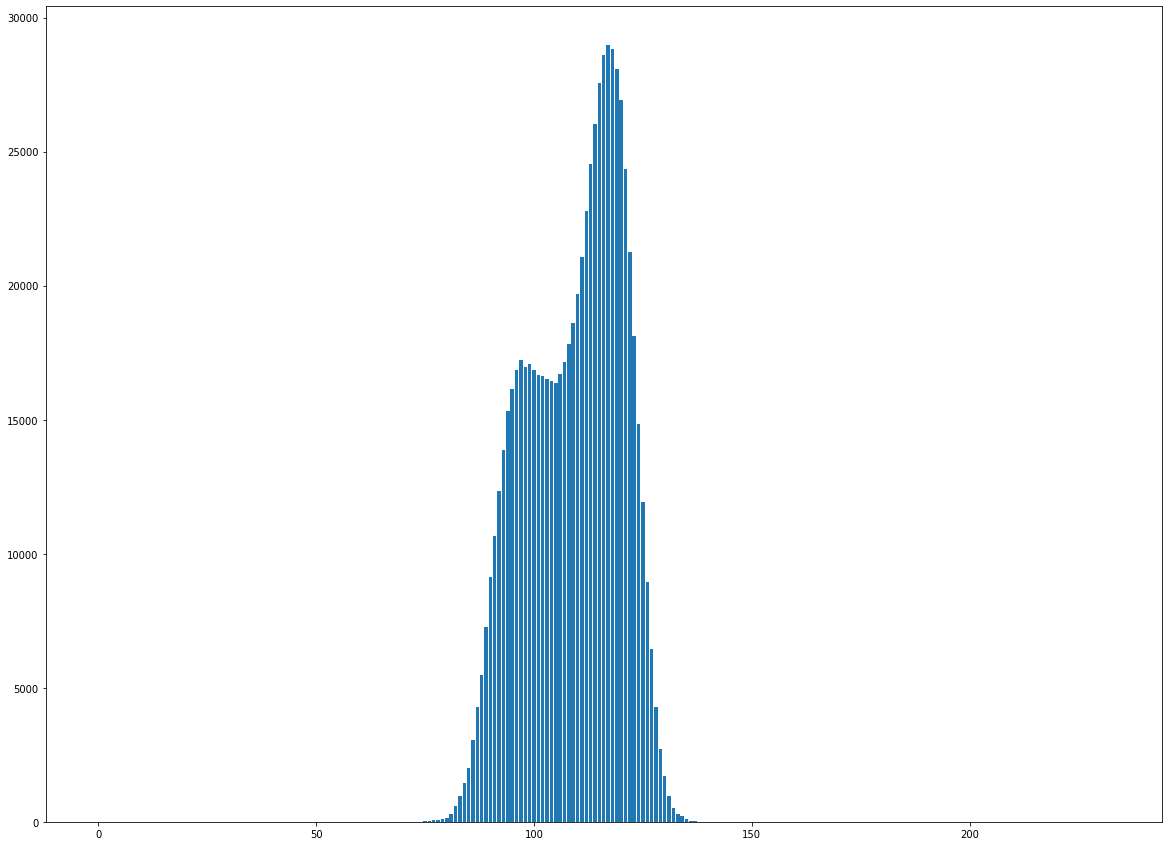

In [ ]:
plt.figure(figsize=(20,15))
plt.bar(np.arange(0,233), mask_y)

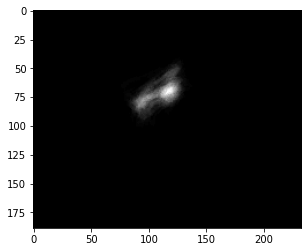

In [ ]:
plt.imshow(mask_combined[:,:,75], cmap='gray')

In [ ]:
mask_combined[:,:,75].shape

(189, 233)

In [ ]:
mask_z = np.zeros((189))
for i in range(197):
    mask_z = mask_z + mask_combined[:,:,i].sum(1)

<BarContainer object of 189 artists>

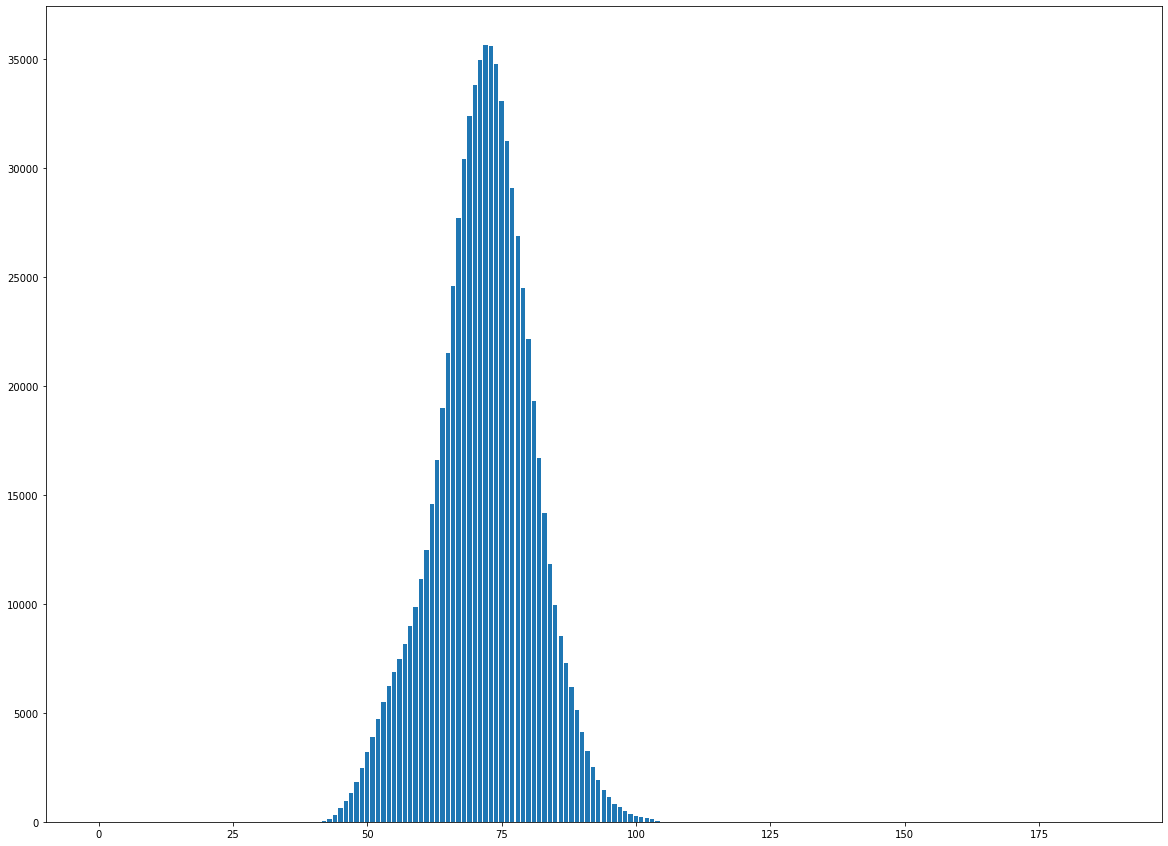

In [ ]:
plt.figure(figsize=(20,15))
plt.bar(np.arange(0,189), mask_z)

In [ ]:
# Load single MRI and Masks
first_mri =  np.array(nib.load("/content/ADNI_Original/100/ADNI_002_S_0295.nii.gz").dataobj).T
first_lbl_l = np.array(nib.load("/content/ADNI_Labels/Labels_100/ADNI_002_S_0295_L.nii.gz").dataobj).T
first_lbl_r = np.array(nib.load("/content/ADNI_Labels/Labels_100/ADNI_002_S_0295_R.nii.gz").dataobj).T

In [ ]:
first_mri.shape

(189, 233, 197)

In [ ]:
first_mri = first_mri[8:136,44:172,36:164]
first_lbl_l = first_lbl_l[8:136,44:172,36:164]
first_lbl_r = first_lbl_r[8:136,44:172,36:164]


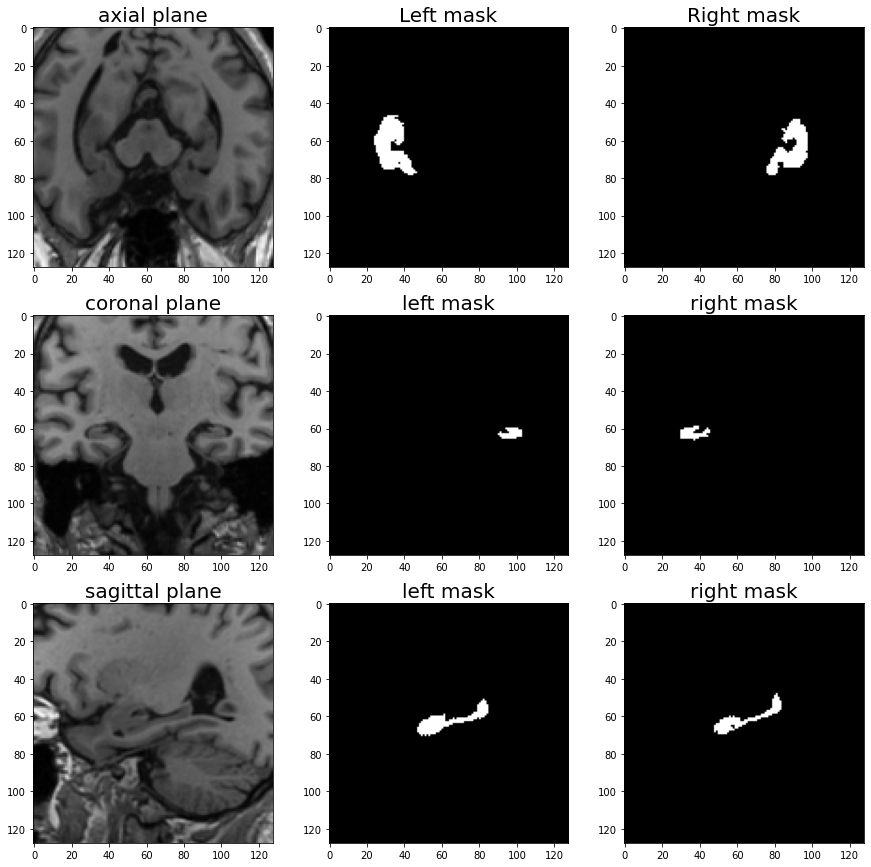

In [ ]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(3,3,1)
ax1.imshow(first_mri[66,:,:], cmap='gray')
plt.title("axial plane", fontsize=20)

ax1 = fig.add_subplot(3,3,2)
ax1.imshow(first_lbl_l[66,:,:], cmap='gray')
plt.title("Left mask", fontsize=20)

ax1 = fig.add_subplot(3,3,3)
ax1.imshow(first_lbl_r[66,:,:], cmap='gray')
plt.title("Right mask", fontsize=20)

ax2 = fig.add_subplot(3,3,4)
ax2.imshow(np.flip(first_mri[:,64,:]), cmap='gray')
plt.title("coronal plane", fontsize=20)

ax2 = fig.add_subplot(3,3,5)
ax2.imshow(np.flip(first_lbl_l[:,64,:]), cmap='gray')
plt.title("left mask", fontsize=20)

ax2 = fig.add_subplot(3,3,6)
ax2.imshow(np.flip(first_lbl_r[:,64,:]), cmap='gray')
plt.title("right mask", fontsize=20)

ax3 = fig.add_subplot(3,3,7)
ax3.imshow(np.flip(first_mri[:,:,35]), cmap='gray')
plt.title("sagittal plane", fontsize=20);

ax3 = fig.add_subplot(3,3,8)
ax3.imshow(np.flip(first_lbl_l[:,:,35]), cmap='gray')
plt.title("left mask", fontsize=20);

ax3 = fig.add_subplot(3,3,9)
ax3.imshow(np.flip(first_lbl_r[:,:,86]), cmap='gray')
plt.title("right mask", fontsize=20);
plt.show()

### Load entire dataset (sliced) 

In [ ]:
MRI_PATH = '/content/ADNI_Original'
LABELS_PATH = '/content/ADNI_Labels'

filelist_100 = os.listdir(MRI_PATH+"/100") # List the folders
filelist_100 = sorted(filelist_100)

mri = [np.array(nib.load(MRI_PATH+"/100/"+f).dataobj).T[8:136,44:172,36:164] for f in filelist_100]
mri_array = np.array(mri, dtype = np.float32)

mri = [np.array(nib.load(LABELS_PATH+"/Labels_100/"+f[:-7]+"_L.nii.gz").dataobj).T[8:136,44:172,36:164] for f in filelist_100]
labels_l_array = np.array(mri, dtype = np.float32)

# mri = [np.array(nib.load(LABELS_PATH+"/Labels_100/"+f[:-7]+"_R.nii.gz").dataobj).T[8:136,44:172,36:164] for f in filelist_100]
# labels_r_array = np.array(mri)

# del(mri)

In [ ]:
print(mri_array.min(), mri_array.max())
print(labels_l_array.min(),labels_l_array.max())

0.0 14094.0
0.0 1.0


In [ ]:
# Scaling MRI

for i in range(len(mri_array)):
    mri_array[i] = mri_array[i]/mri_array[i].max()

In [ ]:
mri_array.max()

1.0

In [ ]:
mri_array.min()

0.0

### 3D Unet implementation 

In [ ]:
import os
from keras.models import Model
from keras import backend as K
from tensorflow.keras.optimizers import Adadelta
from tensorflow.python.keras.utils.multi_gpu_utils import multi_gpu_model
from keras.models import model_from_json
from keras.layers import Input, Conv3D, Dense, UpSampling3D, Activation, MaxPooling3D, Dropout, concatenate, Flatten, Multiply, Subtract


In [ ]:
data_shape = (128,128,128, 1)

inputs = Input(shape=(data_shape))

conv_block_1 = Conv3D(64, (3, 3, 3), strides=(1, 1, 1), padding='same')(inputs)
conv_block_1 = Activation('relu')(conv_block_1)
# conv_block_1 = Conv3D(64, (3, 3, 3), strides=(1, 1, 1), padding='same')(conv_block_1)
# conv_block_1 = Activation('relu')(conv_block_1)
pool_block_1 = MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2))(conv_block_1)

conv_block_2 = Conv3D(64, (3, 3, 3), strides=(1, 1, 1), padding='same')(pool_block_1)
conv_block_2 = Activation('relu')(conv_block_2)
# conv_block_2 = Conv3D(64, (3, 3, 3), strides=(1, 1, 1), padding='same')(conv_block_2)
# conv_block_2 = Activation('relu')(conv_block_2)
pool_block_2 = MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2))(conv_block_2)

conv_block_3 = Conv3D(128, (3, 3, 3), strides=(1, 1, 1), padding='same')(pool_block_2)
conv_block_3 = Activation('relu')(conv_block_3)
# conv_block_3 = Conv3D(128, (3, 3, 3), strides=(1, 1, 1), padding='same')(conv_block_3)
# conv_block_3 = Activation('relu')(conv_block_3)
# # pool_block_3 = MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2))(conv_block_3)

# # conv_block_4 = Conv3D(256, (3, 3, 3), strides=(1, 1, 1), padding='same')(pool_block_3)
# # conv_block_4 = Activation('relu')(conv_block_4)
# # conv_block_4 = Conv3D(256, (3, 3, 3), strides=(1, 1, 1), padding='same')(conv_block_4)
# # conv_block_4 = Activation('relu')(conv_block_4)
# # pool_block_4 = MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2))(conv_block_4)

# # conv_block_5 = Conv3D(256, (3, 3, 3), strides=(1, 1, 1), padding='same')(pool_block_4)
# # conv_block_5 = Activation('relu')(conv_block_5)
# # conv_block_5 = Conv3D(256, (3, 3, 3), strides=(1, 1, 1), padding='same')(conv_block_5)
# # conv_block_5 = Activation('relu')(conv_block_5)

# # encoder = Model(inputs=inputs, outputs=conv_block_5)

# # up_block_1 = UpSampling3D((2, 2, 2))(conv_block_5)
# # up_block_1 = Conv3D(512, (3, 3, 3), strides=(1, 1, 1), padding='same')(up_block_1)

# # merge_1 = concatenate([conv_block_4, up_block_1])

# # conv_block_6 = Conv3D(256, (3, 3, 3), strides=(1, 1, 1), padding='same')(merge_1)
# # conv_block_6 = Activation('relu')(conv_block_6)
# # conv_block_6 = Conv3D(256, (3, 3, 3), strides=(1, 1, 1), padding='same')(conv_block_6)
# # conv_block_6 = Activation('relu')(conv_block_6)

# # up_block_2 = UpSampling3D((2, 2, 2))(conv_block_6)
# # up_block_2 = Conv3D(256, (3, 3, 3), strides=(1, 1, 1), padding='same')(up_block_2)

# # merge_2 = concatenate([conv_block_3, up_block_2])

# conv_block_7 = Conv3D(128, (3, 3, 3), strides=(1, 1, 1), padding='same')(merge_2)
# conv_block_7 = Activation('relu')(conv_block_7)
# conv_block_7 = Conv3D(128, (3, 3, 3), strides=(1, 1, 1), padding='same')(conv_block_7)
# conv_block_7 = Activation('relu')(conv_block_7)

up_block_3 = UpSampling3D((2, 2, 2))(conv_block_3)
up_block_3 = Conv3D(128, (3, 3, 3), strides=(1, 1, 1), padding='same')(up_block_3)

merge_3 = concatenate([conv_block_2, up_block_3])

conv_block_8 = Conv3D(64, (3, 3, 3), strides=(1, 1, 1), padding='same')(merge_3)
conv_block_8 = Activation('relu')(conv_block_8)
# conv_block_8 = Conv3D(64, (3, 3, 3), strides=(1, 1, 1), padding='same')(conv_block_8)
# conv_block_8 = Activation('relu')(conv_block_8)

up_block_4 = UpSampling3D((2, 2, 2))(conv_block_8)
up_block_4 = Conv3D(64, (3, 3, 3), strides=(1, 1, 1), padding='same')(up_block_4)

merge_4 = concatenate([conv_block_1, up_block_4])

conv_block_9 = Conv3D(64, (3, 3, 3), strides=(1, 1, 1), padding='same')(merge_4)
conv_block_9 = Activation('relu')(conv_block_9)
# conv_block_9 = Conv3D(64, (3, 3, 3), strides=(1, 1, 1), padding='same')(conv_block_9)
# conv_block_9 = Activation('relu')(conv_block_9)

conv_block_10 = Conv3D(data_shape[-1], (1, 1, 1), strides=(1, 1, 1), padding='same')(conv_block_9)
outputs = Activation('sigmoid')(conv_block_10)

model = Model(inputs=inputs, outputs=outputs)

In [ ]:
data_shape = (128,128,128, 1)

inputs = Input(shape=(data_shape))

conv_block_1 = Conv3D(32, (3, 3, 3), strides=(1, 1, 1), padding='same')(inputs)
conv_block_1 = Activation('relu')(conv_block_1)
# conv_block_1 = Conv3D(64, (3, 3, 3), strides=(1, 1, 1), padding='same')(conv_block_1)
# conv_block_1 = Activation('relu')(conv_block_1)
pool_block_1 = MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2))(conv_block_1)

conv_block_2 = Conv3D(32, (3, 3, 3), strides=(1, 1, 1), padding='same')(pool_block_1)
conv_block_2 = Activation('relu')(conv_block_2)
# conv_block_2 = Conv3D(64, (3, 3, 3), strides=(1, 1, 1), padding='same')(conv_block_2)
# conv_block_2 = Activation('relu')(conv_block_2)
# pool_block_2 = MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2))(conv_block_2)

# conv_block_3 = Conv3D(128, (3, 3, 3), strides=(1, 1, 1), padding='same')(pool_block_2)
# conv_block_3 = Activation('relu')(conv_block_3)
# conv_block_3 = Conv3D(128, (3, 3, 3), strides=(1, 1, 1), padding='same')(conv_block_3)
# conv_block_3 = Activation('relu')(conv_block_3)
# # pool_block_3 = MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2))(conv_block_3)

# # conv_block_4 = Conv3D(256, (3, 3, 3), strides=(1, 1, 1), padding='same')(pool_block_3)
# # conv_block_4 = Activation('relu')(conv_block_4)
# # conv_block_4 = Conv3D(256, (3, 3, 3), strides=(1, 1, 1), padding='same')(conv_block_4)
# # conv_block_4 = Activation('relu')(conv_block_4)
# # pool_block_4 = MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2))(conv_block_4)

# # conv_block_5 = Conv3D(256, (3, 3, 3), strides=(1, 1, 1), padding='same')(pool_block_4)
# # conv_block_5 = Activation('relu')(conv_block_5)
# # conv_block_5 = Conv3D(256, (3, 3, 3), strides=(1, 1, 1), padding='same')(conv_block_5)
# # conv_block_5 = Activation('relu')(conv_block_5)

# # encoder = Model(inputs=inputs, outputs=conv_block_5)

# # up_block_1 = UpSampling3D((2, 2, 2))(conv_block_5)
# # up_block_1 = Conv3D(512, (3, 3, 3), strides=(1, 1, 1), padding='same')(up_block_1)

# # merge_1 = concatenate([conv_block_4, up_block_1])

# # conv_block_6 = Conv3D(256, (3, 3, 3), strides=(1, 1, 1), padding='same')(merge_1)
# # conv_block_6 = Activation('relu')(conv_block_6)
# # conv_block_6 = Conv3D(256, (3, 3, 3), strides=(1, 1, 1), padding='same')(conv_block_6)
# # conv_block_6 = Activation('relu')(conv_block_6)

# # up_block_2 = UpSampling3D((2, 2, 2))(conv_block_6)
# # up_block_2 = Conv3D(256, (3, 3, 3), strides=(1, 1, 1), padding='same')(up_block_2)

# # merge_2 = concatenate([conv_block_3, up_block_2])

# conv_block_7 = Conv3D(128, (3, 3, 3), strides=(1, 1, 1), padding='same')(merge_2)
# conv_block_7 = Activation('relu')(conv_block_7)
# conv_block_7 = Conv3D(128, (3, 3, 3), strides=(1, 1, 1), padding='same')(conv_block_7)
# conv_block_7 = Activation('relu')(conv_block_7)

# up_block_3 = UpSampling3D((2, 2, 2))(conv_block_3)
# up_block_3 = Conv3D(128, (3, 3, 3), strides=(1, 1, 1), padding='same')(up_block_3)

# merge_3 = concatenate([conv_block_2, up_block_3])

conv_block_8 = Conv3D(32, (3, 3, 3), strides=(1, 1, 1), padding='same')(conv_block_2)
conv_block_8 = Activation('relu')(conv_block_8)
# conv_block_8 = Conv3D(64, (3, 3, 3), strides=(1, 1, 1), padding='same')(conv_block_8)
# conv_block_8 = Activation('relu')(conv_block_8)

up_block_4 = UpSampling3D((2, 2, 2))(conv_block_8)
up_block_4 = Conv3D(32, (3, 3, 3), strides=(1, 1, 1), padding='same')(up_block_4)

merge_4 = concatenate([conv_block_1, up_block_4])

conv_block_9 = Conv3D(32, (3, 3, 3), strides=(1, 1, 1), padding='same')(merge_4)
conv_block_9 = Activation('relu')(conv_block_9)
# conv_block_9 = Conv3D(32, (3, 3, 3), strides=(1, 1, 1), padding='same')(conv_block_9)
# conv_block_9 = Activation('relu')(conv_block_9)

conv_block_10 = Conv3D(data_shape[-1], (1, 1, 1), strides=(1, 1, 1), padding='same')(conv_block_9)
outputs = Activation('sigmoid')(conv_block_10)

model = Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                28, 1)]                                                           
                                                                                                  
 conv3d (Conv3D)                (None, 128, 128, 12  896         ['input_1[0][0]']                
                                8, 32)                                                            
                                                                                                  
 activation (Activation)        (None, 128, 128, 12  0           ['conv3d[0][0]']                 
                                8, 32)                                                        

In [ ]:
# Loss Function:
# def dice_coefficient(y_true, y_pred):
#     smoothing_factor = 1
#     flat_y_true = K.flatten(y_true)
#     flat_y_pred = K.flatten(y_pred)
#     return (2. * K.sum(flat_y_true * flat_y_pred) + smoothing_factor) / (K.sum(flat_y_true) + K.sum(flat_y_pred) + smoothing_factor)

# def dice_coefficient_loss(y_true, y_pred):
#     return 1 - dice_coefficient(y_true, y_pred)

In [ ]:
# model.compile(optimizer = Adadelta(learning_rate=0.01), loss=dice_coefficient_loss, metrics=[dice_coefficient, 'acc'])

In [ ]:
from keras.metrics import MeanIoU, binary_crossentropy
import tensorflow as tf
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)
    return numerator / (denominator + tf.keras.backend.epsilon())
    
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - tf.math.log(dice_coefficient(y_true, y_pred) + tf.keras.backend.epsilon())
    
model.compile(optimizer='adam', loss=loss, metrics=[dice_coefficient])

In [ ]:
hist = model.fit(mri_array[0:10], labels_l_array[0:10], epochs= 20, batch_size=1, validation_split= 0.15)

Epoch 1/20
8/8 [==============================] - 95s 8s/step - loss: 6.8827 - dice_coefficient: 0.0022 - val_loss: 7.4556 - val_dice_coefficient: 6.0495e-04
Epoch 2/20
8/8 [==============================] - 60s 8s/step - loss: 6.5235 - dice_coefficient: 0.0026 - val_loss: 5.6153 - val_dice_coefficient: 0.0042
Epoch 3/20
8/8 [==============================] - 60s 8s/step - loss: 5.9778 - dice_coefficient: 0.0032 - val_loss: 5.0679 - val_dice_coefficient: 0.0065
Epoch 4/20
8/8 [==============================] - 59s 7s/step - loss: 5.2049 - dice_coefficient: 0.0063 - val_loss: 4.7585 - val_dice_coefficient: 0.0091
Epoch 5/20
8/8 [==============================] - 59s 7s/step - loss: 4.7994 - dice_coefficient: 0.0088 - val_loss: 4.4075 - val_dice_coefficient: 0.0126
Epoch 6/20
8/8 [==============================] - 60s 8s/step - loss: 4.3718 - dice_coefficient: 0.0139 - val_loss: 6.2638 - val_dice_coefficient: 0.0020
Epoch 7/20
8/8 [==============================] - 59s 7s/step - loss: 4.

KeyboardInterrupt: ignored

In [ ]:
hist = model.fit(mri_array[0:10], labels_l_array[0:10], epochs= 20, batch_size=1, validation_split= 0.15)

Epoch 1/20
8/8 [==============================] - 22s 3s/step - loss: 6.5906 - dice_coefficient: 0.0021 - val_loss: 6.1718 - val_dice_coefficient: 0.0030
Epoch 2/20
8/8 [==============================] - 20s 2s/step - loss: 6.2574 - dice_coefficient: 0.0025 - val_loss: 5.7571 - val_dice_coefficient: 0.0033
Epoch 3/20
8/8 [==============================] - 20s 2s/step - loss: 5.5805 - dice_coefficient: 0.0042 - val_loss: 4.9666 - val_dice_coefficient: 0.0071
Epoch 4/20
8/8 [==============================] - 20s 2s/step - loss: 4.8257 - dice_coefficient: 0.0086 - val_loss: 4.5312 - val_dice_coefficient: 0.0110
Epoch 5/20
8/8 [==============================] - 20s 2s/step - loss: 4.4483 - dice_coefficient: 0.0127 - val_loss: 4.8855 - val_dice_coefficient: 0.0090
Epoch 6/20
8/8 [==============================] - 20s 3s/step - loss: 3.6002 - dice_coefficient: 0.0306 - val_loss: 3.5691 - val_dice_coefficient: 0.0339
Epoch 7/20
8/8 [==============================] - 20s 2s/step - loss: 3.7357

In [ ]:
hist2 = model.fit(mri_array[11:20], labels_l_array[11:20], epochs= 10, batch_size=1, validation_split= 0.15)

Epoch 1/10
7/7 [==============================] - 17s 2s/step - loss: 3.1668 - dice_coefficient: 0.0712 - val_loss: 3.0448 - val_dice_coefficient: 0.0544
Epoch 2/10
7/7 [==============================] - 17s 3s/step - loss: 4.3969 - dice_coefficient: 0.0211 - val_loss: 4.0622 - val_dice_coefficient: 0.0208
Epoch 3/10
7/7 [==============================] - 18s 3s/step - loss: 4.8084 - dice_coefficient: 0.0143 - val_loss: 5.1782 - val_dice_coefficient: 0.0102
Epoch 4/10
7/7 [==============================] - 18s 3s/step - loss: 4.4489 - dice_coefficient: 0.0173 - val_loss: 2.9652 - val_dice_coefficient: 0.0533
Epoch 5/10
7/7 [==============================] - 17s 2s/step - loss: 3.9875 - dice_coefficient: 0.0217 - val_loss: 3.5136 - val_dice_coefficient: 0.0329
Epoch 6/10
7/7 [==============================] - 17s 2s/step - loss: 4.0678 - dice_coefficient: 0.0330 - val_loss: 3.6955 - val_dice_coefficient: 0.0271
Epoch 7/10
7/7 [==============================] - 17s 3s/step - loss: 4.1474

In [ ]:
hist3 = model.fit(mri_array[21:30], labels_l_array[21:30], epochs= 10, batch_size=1, validation_split= 0.15)

Epoch 1/10
7/7 [==============================] - 17s 3s/step - loss: 4.2676 - dice_coefficient: 0.0164 - val_loss: 4.0709 - val_dice_coefficient: 0.0195
Epoch 2/10
7/7 [==============================] - 17s 2s/step - loss: 3.8872 - dice_coefficient: 0.0228 - val_loss: 3.4180 - val_dice_coefficient: 0.0348
Epoch 3/10
7/7 [==============================] - 17s 3s/step - loss: 3.4768 - dice_coefficient: 0.0426 - val_loss: 2.6861 - val_dice_coefficient: 0.0723
Epoch 4/10
7/7 [==============================] - 17s 2s/step - loss: 2.7403 - dice_coefficient: 0.0719 - val_loss: 2.4102 - val_dice_coefficient: 0.0928
Epoch 5/10
7/7 [==============================] - 17s 2s/step - loss: 2.6918 - dice_coefficient: 0.0878 - val_loss: 2.2820 - val_dice_coefficient: 0.1043
Epoch 6/10
7/7 [==============================] - 17s 2s/step - loss: 2.5292 - dice_coefficient: 0.0852 - val_loss: 1.8916 - val_dice_coefficient: 0.1551
Epoch 7/10
7/7 [==============================] - 17s 2s/step - loss: 2.6042

In [ ]:
# hist4 = model.fit(mri_array[31:40], labels_l_array[31:40], epochs= 10, batch_size=1, validation_split= 0.15)

In [ ]:
hist100 = model.fit(mri_array, labels_l_array, epochs= 10, batch_size=1, validation_split= 0.15)

Epoch 1/10
85/85 [==============================] - 204s 2s/step - loss: 3.2101 - dice_coefficient: 0.0666 - val_loss: 2.7731 - val_dice_coefficient: 0.0674
Epoch 2/10
85/85 [==============================] - 206s 2s/step - loss: 2.7152 - dice_coefficient: 0.0833 - val_loss: 1.8246 - val_dice_coefficient: 0.1818
Epoch 3/10
85/85 [==============================] - 206s 2s/step - loss: 2.1810 - dice_coefficient: 0.1407 - val_loss: 1.4219 - val_dice_coefficient: 0.2505
Epoch 4/10
85/85 [==============================] - 206s 2s/step - loss: 1.3828 - dice_coefficient: 0.2665 - val_loss: 1.1375 - val_dice_coefficient: 0.3393
Epoch 5/10
85/85 [==============================] - 203s 2s/step - loss: 1.2701 - dice_coefficient: 0.3010 - val_loss: 0.9104 - val_dice_coefficient: 0.4181
Epoch 6/10
85/85 [==============================] - 205s 2s/step - loss: 1.0662 - dice_coefficient: 0.3633 - val_loss: 1.1096 - val_dice_coefficient: 0.3678
Epoch 7/10
85/85 [==============================] - 203s 2

In [ ]:
# model.save("/content/drive/MyDrive/UNet3d")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/UNet3d/assets


In [ ]:
pred = model.predict(mri_array[0:1])

In [ ]:
pred = pred.reshape(1, 128, 128, 128)

In [ ]:
pred.min()

0.0

In [ ]:
pred.max()

1.0

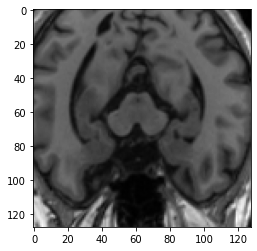

In [ ]:
plt.imshow(mri_array[0][66], cmap='gray')

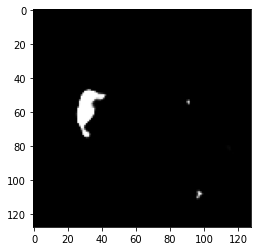

In [ ]:
plt.imshow(pred[0][66], cmap='gray')

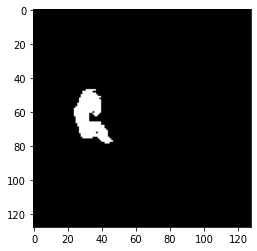

In [ ]:
plt.imshow(labels_l_array[0][66], cmap='gray')

In [ ]:
hist200 = model.fit(mri_array, labels_l_array, epochs= 25, batch_size=1, validation_split= 0.15)

Epoch 1/25
85/85 [==============================] - 205s 2s/step - loss: 0.6817 - dice_coefficient: 0.5181 - val_loss: 0.5441 - val_dice_coefficient: 0.5873
Epoch 2/25
85/85 [==============================] - 203s 2s/step - loss: 0.6505 - dice_coefficient: 0.5345 - val_loss: 0.5277 - val_dice_coefficient: 0.5963
Epoch 3/25
85/85 [==============================] - 203s 2s/step - loss: 0.6324 - dice_coefficient: 0.5452 - val_loss: 0.7500 - val_dice_coefficient: 0.4784
Epoch 4/25
85/85 [==============================] - 203s 2s/step - loss: 0.5795 - dice_coefficient: 0.5707 - val_loss: 0.4678 - val_dice_coefficient: 0.6322
Epoch 5/25
85/85 [==============================] - 203s 2s/step - loss: 0.5061 - dice_coefficient: 0.6106 - val_loss: 0.4378 - val_dice_coefficient: 0.6524
Epoch 6/25
85/85 [==============================] - 205s 2s/step - loss: 0.4900 - dice_coefficient: 0.6209 - val_loss: 0.4246 - val_dice_coefficient: 0.6608
Epoch 7/25
85/85 [==============================] - 203s 2

In [ ]:
model.save("/content/drive/MyDrive/UNet3d")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/UNet3d/assets


In [ ]:
model.load_weights("/content/drive/MyDrive/UNet3d")

In [ ]:
hist200 = model.fit(mri_array, labels_l_array, epochs= 25, batch_size=1, validation_split= 0.15)

Epoch 1/25
85/85 [==============================] - 221s 2s/step - loss: 0.2052 - dice_coefficient: 0.8183 - val_loss: 0.2119 - val_dice_coefficient: 0.8125
Epoch 2/25
85/85 [==============================] - 208s 2s/step - loss: 0.1999 - dice_coefficient: 0.8225 - val_loss: 0.1917 - val_dice_coefficient: 0.8290
Epoch 3/25
85/85 [==============================] - 208s 2s/step - loss: 0.1885 - dice_coefficient: 0.8316 - val_loss: 0.1956 - val_dice_coefficient: 0.8257
Epoch 4/25
85/85 [==============================] - 210s 2s/step - loss: 0.1888 - dice_coefficient: 0.8314 - val_loss: 0.1925 - val_dice_coefficient: 0.8281
Epoch 5/25
85/85 [==============================] - 210s 2s/step - loss: 0.1900 - dice_coefficient: 0.8304 - val_loss: 0.1855 - val_dice_coefficient: 0.8338
Epoch 6/25
85/85 [==============================] - 210s 2s/step - loss: 0.2221 - dice_coefficient: 0.8052 - val_loss: 0.2097 - val_dice_coefficient: 0.8153
Epoch 7/25
85/85 [==============================] - 210s 2

In [ ]:
hist200 = model.fit(mri_array, labels_l_array, epochs= 25, batch_size=1, validation_split= 0.15)

Epoch 1/25
85/85 [==============================] - 209s 2s/step - loss: 0.1479 - dice_coefficient: 0.8653 - val_loss: 0.1676 - val_dice_coefficient: 0.8487
Epoch 2/25
85/85 [==============================] - 207s 2s/step - loss: 0.1505 - dice_coefficient: 0.8631 - val_loss: 0.1791 - val_dice_coefficient: 0.8393
Epoch 3/25
85/85 [==============================] - 207s 2s/step - loss: 0.1541 - dice_coefficient: 0.8602 - val_loss: 0.1768 - val_dice_coefficient: 0.8413
Epoch 4/25
85/85 [==============================] - 207s 2s/step - loss: 0.1490 - dice_coefficient: 0.8644 - val_loss: 0.1678 - val_dice_coefficient: 0.8486
Epoch 5/25
85/85 [==============================] - 209s 2s/step - loss: 0.1463 - dice_coefficient: 0.8667 - val_loss: 0.1790 - val_dice_coefficient: 0.8394
Epoch 6/25
85/85 [==============================] - 209s 2s/step - loss: 0.1464 - dice_coefficient: 0.8666 - val_loss: 0.1758 - val_dice_coefficient: 0.8418
Epoch 7/25
85/85 [==============================] - 209s 2

In [ ]:
hist200 = model.fit(mri_array, labels_l_array, epochs= 25, batch_size=2, validation_split= 0.15)

Epoch 1/25
43/43 [==============================] - 240s 5s/step - loss: 0.1229 - dice_coefficient: 0.8870 - val_loss: 0.1516 - val_dice_coefficient: 0.8622
Epoch 2/25
43/43 [==============================] - 199s 5s/step - loss: 0.1193 - dice_coefficient: 0.8899 - val_loss: 0.1524 - val_dice_coefficient: 0.8610
Epoch 3/25
43/43 [==============================] - 199s 5s/step - loss: 0.1190 - dice_coefficient: 0.8898 - val_loss: 0.1509 - val_dice_coefficient: 0.8629
Epoch 4/25
43/43 [==============================] - 199s 5s/step - loss: 0.1196 - dice_coefficient: 0.8896 - val_loss: 0.1604 - val_dice_coefficient: 0.8546
Epoch 5/25
43/43 [==============================] - 199s 5s/step - loss: 0.1212 - dice_coefficient: 0.8880 - val_loss: 0.1544 - val_dice_coefficient: 0.8598
Epoch 6/25
43/43 [==============================] - 198s 5s/step - loss: 0.1181 - dice_coefficient: 0.8911 - val_loss: 0.1524 - val_dice_coefficient: 0.8618
Epoch 7/25
43/43 [==============================] - 199s 5

In [ ]:
pred = model.predict(mri_array[0:2])

In [ ]:
pred = pred.reshape(2, 128, 128, 128)

In [ ]:
pred.min()

0.0

In [ ]:
pred.max()

1.0

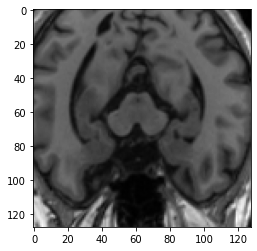

In [ ]:
plt.imshow(mri_array[0][66], cmap='gray')

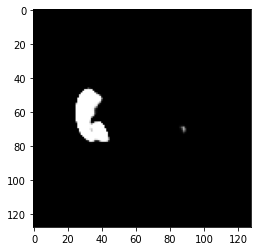

In [ ]:
plt.imshow(pred[0][66], cmap='gray')

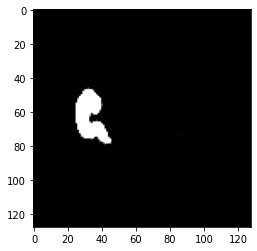

In [ ]:
plt.imshow(pred[0][66], cmap='gray')

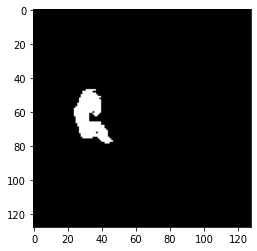

In [ ]:
plt.imshow(labels_l_array[0][66], cmap='gray')

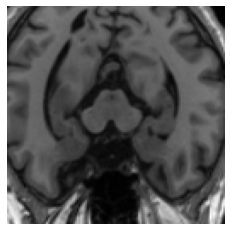

In [ ]:
plt.axis('off')
plt.imshow(mri_array[0][66], cmap='gray')

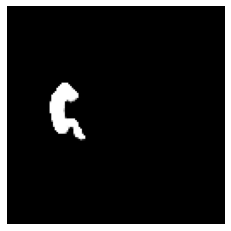

In [ ]:
plt.axis('off')
plt.imshow(pred[0][67], cmap='gray')

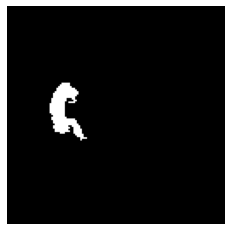

In [ ]:
plt.axis('off')
plt.imshow(labels_l_array[0][67], cmap='gray')

In [ ]:
#Test set
# Load single MRI and Masks
test_mri =  np.array(nib.load("/content/ADNI_Original/35/ADNI_002_S_0685.nii.gz").dataobj).T[8:136,44:172,36:164]
test_lbl_l = np.array(nib.load("/content/ADNI_Labels/Labels_35/ADNI_002_S_0685_L.nii.gz").dataobj).T[8:136,44:172,36:164]


In [ ]:
test_mri = test_mri/test_mri.max()

In [ ]:
test_mri.max()

1.0

In [ ]:
test_mri.shape

(128, 128, 128)

In [ ]:
pred = model.predict(test_mri.reshape(1,128, 128, 128))

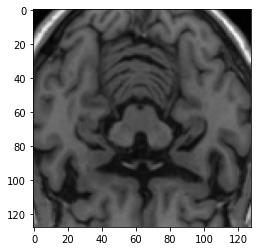

In [ ]:
plt.imshow(test_mri[48], cmap='gray')

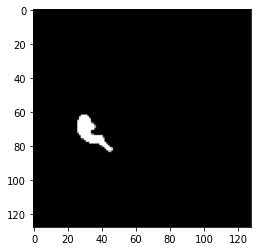

In [ ]:
plt.imshow(pred[0][48].reshape((128,128)), cmap='gray')

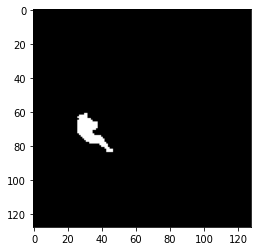

In [ ]:
plt.imshow(test_lbl_l[48], cmap='gray')

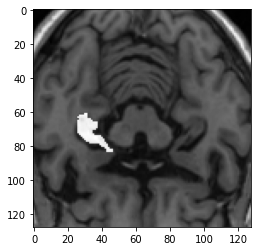

In [ ]:
plt.imshow(test_mri[48]+test_lbl_l[48]*0.5, cmap='gray')

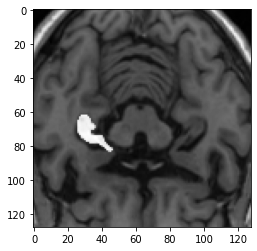

In [ ]:
plt.imshow(test_mri[48]+pred[0][48].reshape((128,128))*0.5, cmap='gray')

* Padding mask back to full size

In [ ]:
def pad_mask(mask: np.ndarray):
    padded_mask = np.concatenate((np.zeros((8,128,128)), mask))
    padded_mask = np.concatenate((padded_mask, np.zeros((53,128,128))))
    padded_mask = np.concatenate((np.zeros((189,44,128)), padded_mask), axis=1)
    padded_mask = np.concatenate((padded_mask, np.zeros((189,61,128))), axis=1)
    padded_mask = np.concatenate((np.zeros((189,233,36)), padded_mask), axis=2)
    padded_mask = np.concatenate((padded_mask, np.zeros((189,233,33))), axis=2)
    return padded_mask

temp_mask = pad_mask(first_lbl_l[8:136,44:172,36:164])

In [ ]:
temp_mask.shape

(189, 233, 197)

In [ ]:
temp_mask2 = (temp_mask-first_lbl_l)

In [ ]:
temp_mask2.max()

0.0

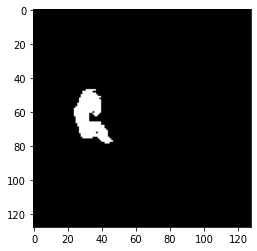

In [ ]:
plt.imshow(first_lbl_l[8:136,44:172,36:164][66], cmap='gray')

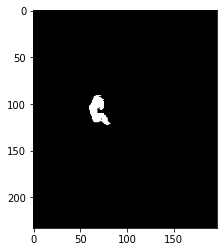

In [ ]:
plt.imshow(temp_mask[74], cmap='gray')

### Model Evaluation using holdout set


In [ ]:
MRI_PATH = '/content/ADNI_Original'
LABELS_PATH = '/content/ADNI_Labels'

filelist_35 = os.listdir(MRI_PATH+"/35") # List the folders
filelist_35 = sorted(filelist_35)

mri = [np.array(nib.load(MRI_PATH+"/35/"+f).dataobj).T[8:136,44:172,36:164] for f in filelist_35]
mri_array_holdout = np.array(mri, dtype = np.float32)

mri = [np.array(nib.load(LABELS_PATH+"/Labels_35/"+f[:-7]+"_L.nii.gz").dataobj).T[8:136,44:172,36:164] for f in filelist_35]
labels_l_array_holdout = np.array(mri, dtype = np.float32)

mri = [np.array(nib.load(LABELS_PATH+"/Labels_35/"+f[:-7]+"_R.nii.gz").dataobj).T[8:136,44:172,36:164] for f in filelist_35]
labels_r_array_holdout = np.array(mri, dtype = np.float32)


In [ ]:
# Scaling MRI

for i in range(len(mri_array_holdout)):
    mri_array_holdout[i] = mri_array_holdout[i]/mri_array_holdout[i].max()

In [ ]:
def pad_mask(mask: np.ndarray):
    padded_mask = np.concatenate((np.zeros((8,128,128)), mask))
    padded_mask = np.concatenate((padded_mask, np.zeros((53,128,128))))
    padded_mask = np.concatenate((np.zeros((189,44,128)), padded_mask), axis=1)
    padded_mask = np.concatenate((padded_mask, np.zeros((189,61,128))), axis=1)
    padded_mask = np.concatenate((np.zeros((189,233,36)), padded_mask), axis=2)
    padded_mask = np.concatenate((padded_mask, np.zeros((189,233,33))), axis=2)
    return padded_mask

In [ ]:
import keras

class CustomCallback(keras.callbacks.Callback):

    def on_predict_end(self, batch, logs=None):
        return pad_mask(batch[0])

In [ ]:
pred_holdout = model.predict(mri_array_holdout, batch_size = 1)

In [ ]:
eval = model.evaluate(mri_array_holdout, labels_l_array_holdout, batch_size = 1)

35/35 [==============================] - 22s 595ms/step - loss: 1.3884 - dice_coefficient: 0.7527


In [ ]:
pred = model.predict(mri_array_holdout[29:30])

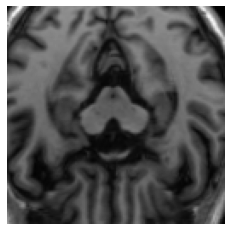

In [ ]:
plt.axis('off')
plt.imshow(mri_array_holdout[29][68], cmap='gray')

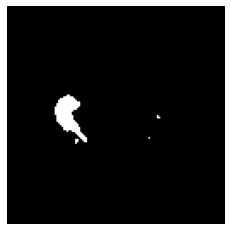

In [ ]:
plt.axis('off')
plt.imshow(pred[0][68].reshape((128,128)), cmap='gray')

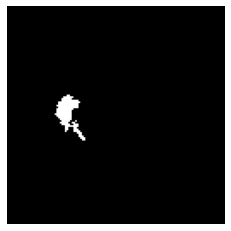

In [ ]:
plt.axis('off')
plt.imshow(labels_l_array_holdout[29][68], cmap='gray')

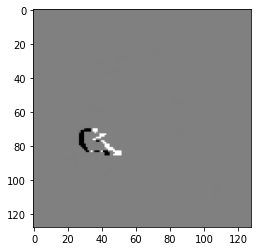

In [ ]:
plt.imshow(np.fliplr(labels_l_array_holdout[8][64])-pred[0][64].reshape((128,128)), cmap='gray')

### Calculating Hippocampus volume 

first_lbl_l

In [ ]:
first_lbl_l

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
np.sum(first_lbl_r)

2960

In [ ]:
mri_r = nib.load(LABELS_PATH+"/Labels_100/"+f[:-7]+"_L.nii.gz")

NameError: ignored